In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [90]:
df = pd.read_csv('/gpfs/home/denesl01/libLTD/GemAnalysis/full_exp.csv')

In [91]:
df = df[df['Deff'] < 2]
df = df[df['n_tracks'] > 20]
df = df[df['n_tracks'] < 100]

In [92]:
substratelist = []
densitylist = []
f1list = []
f2list = []
defflist = []
conditionlist = []

for n,item in df.iterrows():
    deff = item['Deff']
    condition = item['condition']
    fields = item['condition'].split('_')
    substrate = fields[0]
    density = fields[1]
    f1 = fields[2]
    f2 = fields[3]
    
    substratelist.append(substrate)
    densitylist.append(density)
    f1list.append(f1)
    f2list.append(f2)
    defflist.append(deff)
    conditionlist.append(condition)
    
out_df = pd.DataFrame({'substrate': substratelist, 'density': densitylist, 'f1': f1list, 'f2': f2list, 'Deff': defflist, 'condition': conditionlist})


In [93]:
print(out_df[out_df['f2'] == 'undiff'])

     substrate density   f1      f2      Deff               condition
741   collagen      80  6hr  undiff  0.176592  collagen_80_6hr_undiff
742      glass      80  6hr  undiff  0.119086     glass_80_6hr_undiff
743      glass      40  6hr  undiff  0.099440     glass_40_6hr_undiff
744      glass      80  6hr  undiff  0.132921     glass_80_6hr_undiff
745      glass      80  6hr  undiff  0.094480     glass_80_6hr_undiff
...        ...     ...  ...     ...       ...                     ...
4460     glass      20   d3  undiff  0.123990      glass_20_d3_undiff
4461     glass      40   d3  undiff  0.059161      glass_40_d3_undiff
4462  collagen      80   d3  undiff  0.103424   collagen_80_d3_undiff
4463     glass      20   d3  undiff  0.239632      glass_20_d3_undiff
4465     glass      40   d3  undiff  0.211373      glass_40_d3_undiff

[468 rows x 6 columns]


In [94]:
def update_row(row):
    if row['f2'] == 'undiff':
        original_f1 = row['f1']
        row['f1'] = 'D0'
        if original_f1 == '6hr':
            row['f2'] = '0.25'
        elif original_f1 in ['d1', 'd2', 'd3']:
            row['f2'] = original_f1.upper()
    return row

out_df = out_df.apply(update_row, axis=1)

In [95]:
out_df.loc[(out_df['f1'] == 'd1') & (out_df['f2'] == 'D1'), ['f1', 'f2']] = 'D1'

In [96]:
# Create a copy of the DataFrame
df_copy = out_df.copy()

# Modify 'f1' where 'f1' is 'd2' and 'f2' is 'D1'
out_df.loc[(out_df['f1'] == 'd2') & (out_df['f2'] == 'D1'), 'f1'] = 'D1'

# Modify 'f2' where 'f1' was 'd2' and 'f2' was 'D1' in the original DataFrame
out_df.loc[(df_copy['f1'] == 'd2') & (df_copy['f2'] == 'D1'), 'f2'] = 'D2'

In [97]:
# Create a copy of the DataFrame
df_copy = out_df.copy()

# Modify 'f1' where 'f1' is 'd2' and 'f2' is 'D1'
out_df.loc[(out_df['f1'] == 'd1') & (out_df['f2'] == 'D2'), 'f1'] = 'D2'

# Modify 'f2' where 'f1' was 'd2' and 'f2' was 'D1' in the original DataFrame
out_df.loc[(df_copy['f1'] == 'd1') & (df_copy['f2'] == 'D2'), 'f2'] = 'D1'

In [98]:
out_df['f1'] = out_df['f1'].str.upper()
out_df['f2'] = out_df['f2'].str.upper()

In [99]:
print(np.unique(out_df['f1']), np.unique(out_df['f2']))

['D0' 'D1' 'D2' 'D3'] ['0.25' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8']


In [100]:
out_df['f2'] = out_df['f2'].str.lstrip('D')

In [101]:
out_df['f2'] = out_df['f2'].astype(float)

<AxesSubplot: xlabel='f2', ylabel='Deff'>

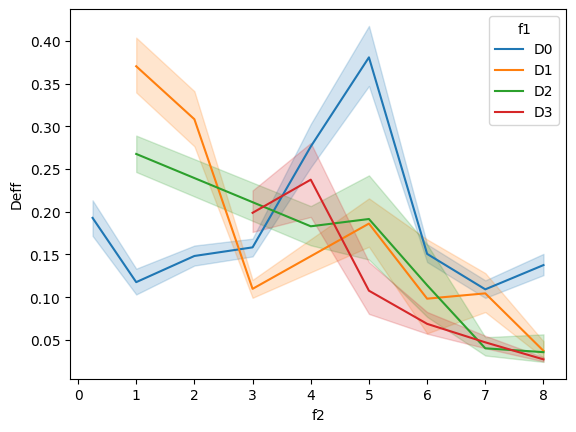

In [102]:
sns.lineplot(data=out_df, x='f2', y='Deff', hue='f1', hue_order=['D0', 'D1', 'D2', 'D3'])

In [103]:
corr_df = out_df.copy()
corr_df.loc[corr_df['f1'] == 'D3', 'f2'] = corr_df.loc[corr_df['f1'] == 'D3', 'f2'] - 2.0




In [104]:
corr_df['combo'] = corr_df['substrate'] + '_' + corr_df['density'] + '_' + corr_df['f1'] 

In [109]:
df_subset = corr_df.copy()

In [112]:
df_subset = df_subset[df_subset['substrate'] == 'collagen']
df_subset = df_subset[df_subset['density'] == '20']

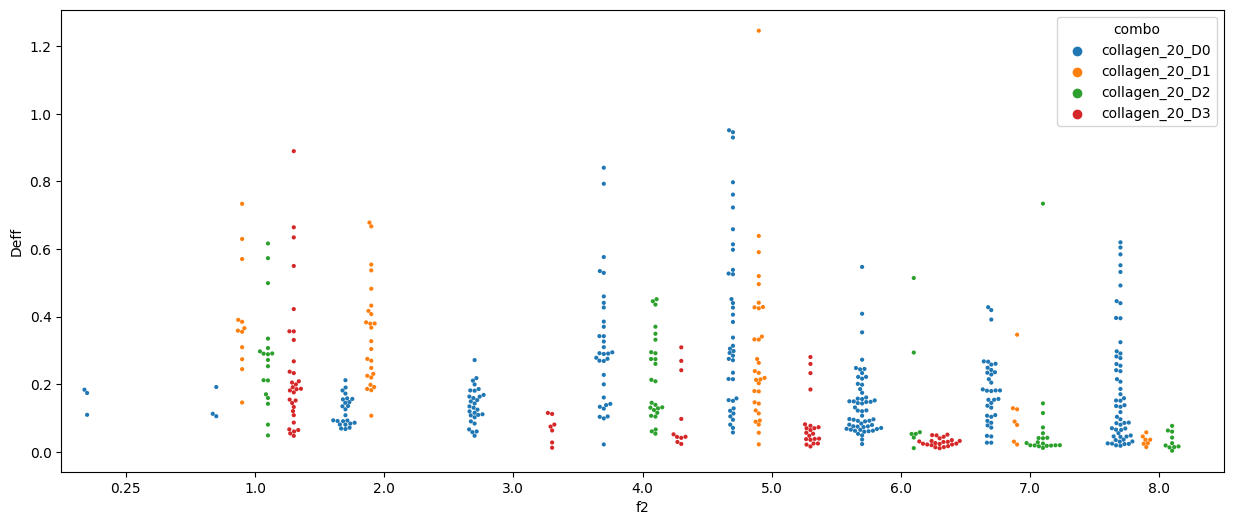

In [117]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.swarmplot(data=df_subset, x='f2', y='Deff', hue='combo', ax=ax, size=3, dodge=True, hue_order=np.unique(df_subset['combo']))
plt.show()

In [107]:
#plot_df = out_df[out_df['density'] == '20']
plot_df = out_df[out_df['d2'] != 'undiff']


print(plot_df)
fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(data=plot_df, x='d2', y='Deff', hue='d1', size=0.5, ax=ax)
plt.xticks(rotation=45, fontsize=10)
fig.tight_layout()
plt.show()

KeyError: 'd2'